In [1]:
import pandas as pd
import geopandas as gpd 
import matplotlib as mpl
import matplotlib.pyplot as plt

# Create Difference Tables for Analysis

In [3]:
DA_shp = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/toronto_shapes/DA_geometries/DA_shp.shp')
DA_shp['GeoUID'] = DA_shp['GeoUID'].astype(int)


<AxesSubplot:>

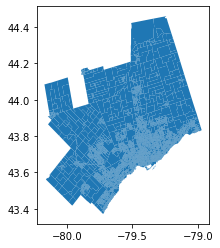

In [21]:
DA_shp.plot()

In [15]:

difference_dic  = {}
DA_shp_dic = {}
times = ['0800', '1100', '1500']

for time in times:
    tt_2019 = pd.read_csv(f'/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/2019_region_routing/data/travel_times/19_06_2019_{time}.csv')
    tt_2020 = pd.read_csv(f'/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/2020_region_routing/data/travel_times/24_06_2020_{time}.csv')
    
    
    #get travel time to nearest clinics 
    min_2019 = tt_2019.loc[tt_2019.groupby('fromId').travel_time.idxmin()]
    min_2020 = tt_2020.loc[tt_2020.groupby('fromId').travel_time.idxmin()]

    #filter out all regions whose closest clinic changed or who were over 2 hours from nearest clinic
    #min_travel_time = pd.merge(min_2019, min_2020, how='inner', on=['fromId', 'toId'])


    #merge 2019 and 2020 travel times
    min_compare = min_2019.merge(min_2020, on='fromId')
    min_compare.rename(columns={'travel_time_x': 'tt_2019', 'travel_time_y': 'tt_2020'}, inplace=True)
    min_compare.drop('toId_y', axis=1, inplace=True)    


    #get difference between 2019 and 2020 travel times
    min_compare['diff'] = min_compare['tt_2020'] - min_compare['tt_2019']



    min_compare = min_compare.merge(DA_shp[['GeoUID', 'geometry']], left_on='fromId', right_on='GeoUID')
    min_compare = gpd.GeoDataFrame(min_compare, geometry='geometry')

    #get plot of all DA regions captured by analysis to plot behind regions which changed negatively
    min_compare_union = min_compare['geometry'].unary_union
    
    #DA_shp['within'] = [True if x.within(min_compare_union) else False for x in DA_shp['geometry'] ]
    #DA_within = DA_shp[DA_shp['within']==True]
    #DA_shp_dic[time] = DA_within

    #get regions with lower access in 2020 versus 2019
    min_compare['neg_access'] = min_compare['diff'] >= 0

    min_compare.to_file(f'/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/results/DA_level/{time}/time_diff_{time}.shp')
    

    
    
    

In [45]:

difference_dic  = {}
DA_shp_dic = {}
times = ['0900']

for time in times:
    tt_2019 = pd.read_csv(f'/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/2019_region_routing/data/travel_times/22_06_2019_{time}.csv')
    tt_2020 = pd.read_csv(f'/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/2020_region_routing/data/travel_times/27_06_2020_{time}.csv')
    
    
    #get travel time to nearest clinics 
    min_2019 = tt_2019.loc[tt_2019.groupby('fromId').travel_time.idxmin()]
    min_2020 = tt_2020.loc[tt_2020.groupby('fromId').travel_time.idxmin()]

    #filter out all regions whose closest clinic changed or who were over 2 hours from nearest clinic
    #min_travel_time = pd.merge(min_2019, min_2020, how='inner', on=['fromId', 'toId'])


    #merge 2019 and 2020 travel times
    min_compare = min_2019.merge(min_2020, on='fromId')
    min_compare.rename(columns={'travel_time_x': 'tt_2019', 'travel_time_y': 'tt_2020'}, inplace=True)
    min_compare.drop('toId_y', axis=1, inplace=True)    


    #get difference between 2019 and 2020 travel times
    min_compare['diff'] = min_compare['tt_2020'] - min_compare['tt_2019']



    min_compare = min_compare.merge(DA_shp[['GeoUID', 'geometry']], left_on='fromId', right_on='GeoUID')
    min_compare = gpd.GeoDataFrame(min_compare, geometry='geometry')

    #get plot of all DA regions captured by analysis to plot behind regions which changed negatively
    min_compare_union = min_compare['geometry'].unary_union
    
    #DA_shp['within'] = [True if x.within(min_compare_union) else False for x in DA_shp['geometry'] ]
    #DA_within = DA_shp[DA_shp['within']==True]
    #DA_shp_dic[time] = DA_within

    #get regions with lower access in 2020 versus 2019
    min_compare['neg_access'] = min_compare['diff'] >= 0

    min_compare.to_file(f'/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/results/DA_level/{time}_sat/time_diff_{time}_sat.shp')

# Load in Difference Tables for Analysis

In [64]:
difference_dic = {}
master_df = pd.DataFrame()
times = ['0800', '1100', '1500', '0900_sat']

for time in times:
    if time[-3:] == 'sat':
        difference_dic[time] = gpd.read_file(f'/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/results/DA_level/{time}/time_diff_{time}.shp')
        difference_dic[time]['time'] = time
        difference_dic[time]['weekend'] = True
        master_df = master_df.append(difference_dic[time])
    else:
        difference_dic[time] = gpd.read_file(f'/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/results/DA_level/{time}/time_diff_{time}.shp')
        difference_dic[time]['time'] = time
        difference_dic[time]['weekend'] = False
        master_df = master_df.append(difference_dic[time])
        
master_df.to_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/results/travel_time_diff/travel_time_diff.shp', index=False)

## Start Visuals

In [2]:
master_df = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/results/travel_time_diff/travel_time_diff.shp')
clinics_gdf = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/clinic_shp/clean_clinics_v2.shp')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


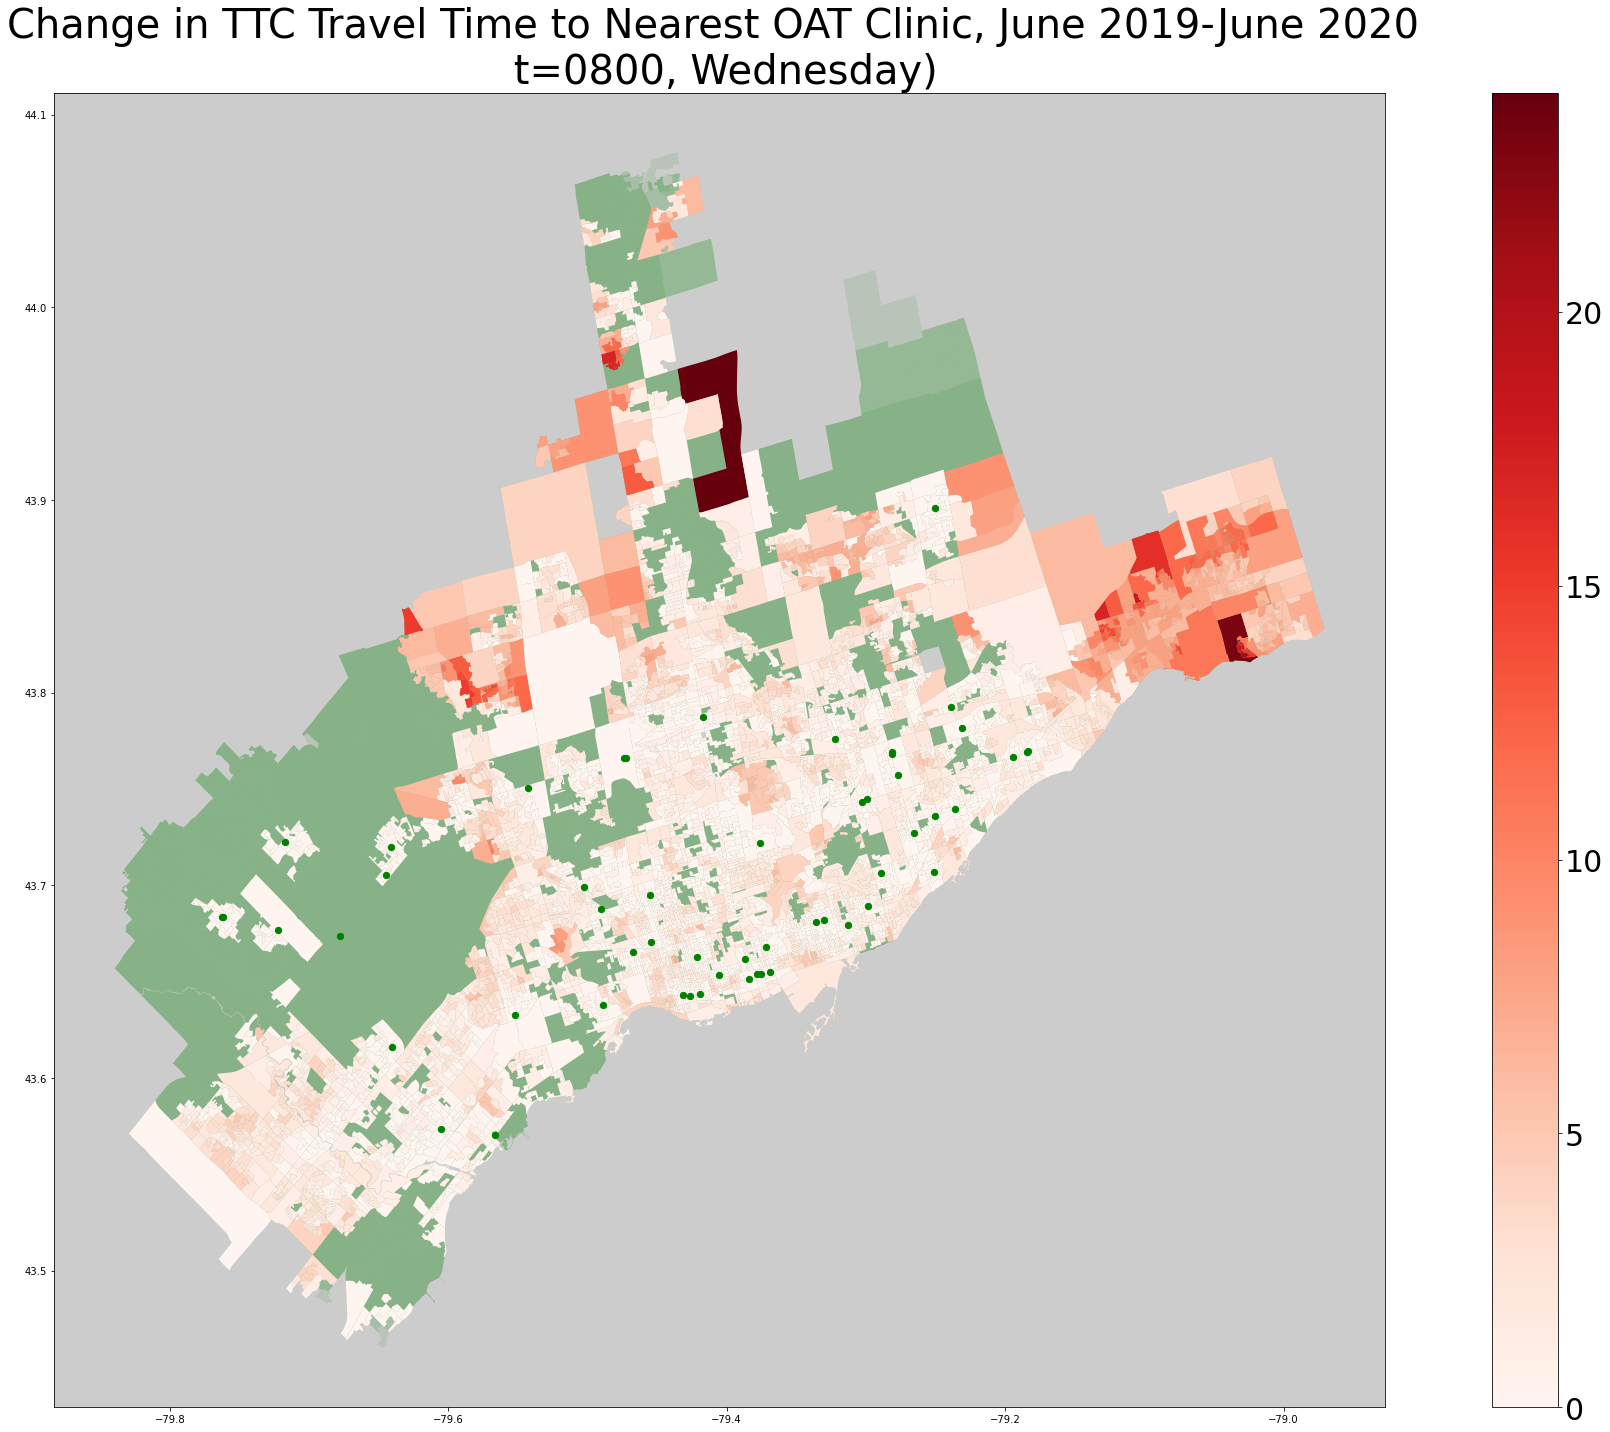

In [80]:
time = '0800'
fig, ax = plt.subplots(figsize=(30, 20))
master_df[(master_df['time']==time) & master_df['neg_access']==0].plot(column='diff', ax=ax, legend=True, color='green', alpha=0.1)
master_df[(master_df['time']==time) & master_df['neg_access']==1].plot(column='diff', ax=ax, legend=True, cmap='Reds')
clinics_gdf.plot(ax=ax, markersize=40, color='green')
cb_ax = fig.axes[1]
ax.patch.set_facecolor('black')
ax.patch.set_alpha(0.2)
plt.title(f"Change in TTC Travel Time to Nearest OAT Clinic, June 2019-June 2020 \n t={time}, Wednesday)", fontsize=40)
cb_ax.tick_params(labelsize=30)
plt.tight_layout()
#plt.savefig(f'/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/results/imgs/{time}.png')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


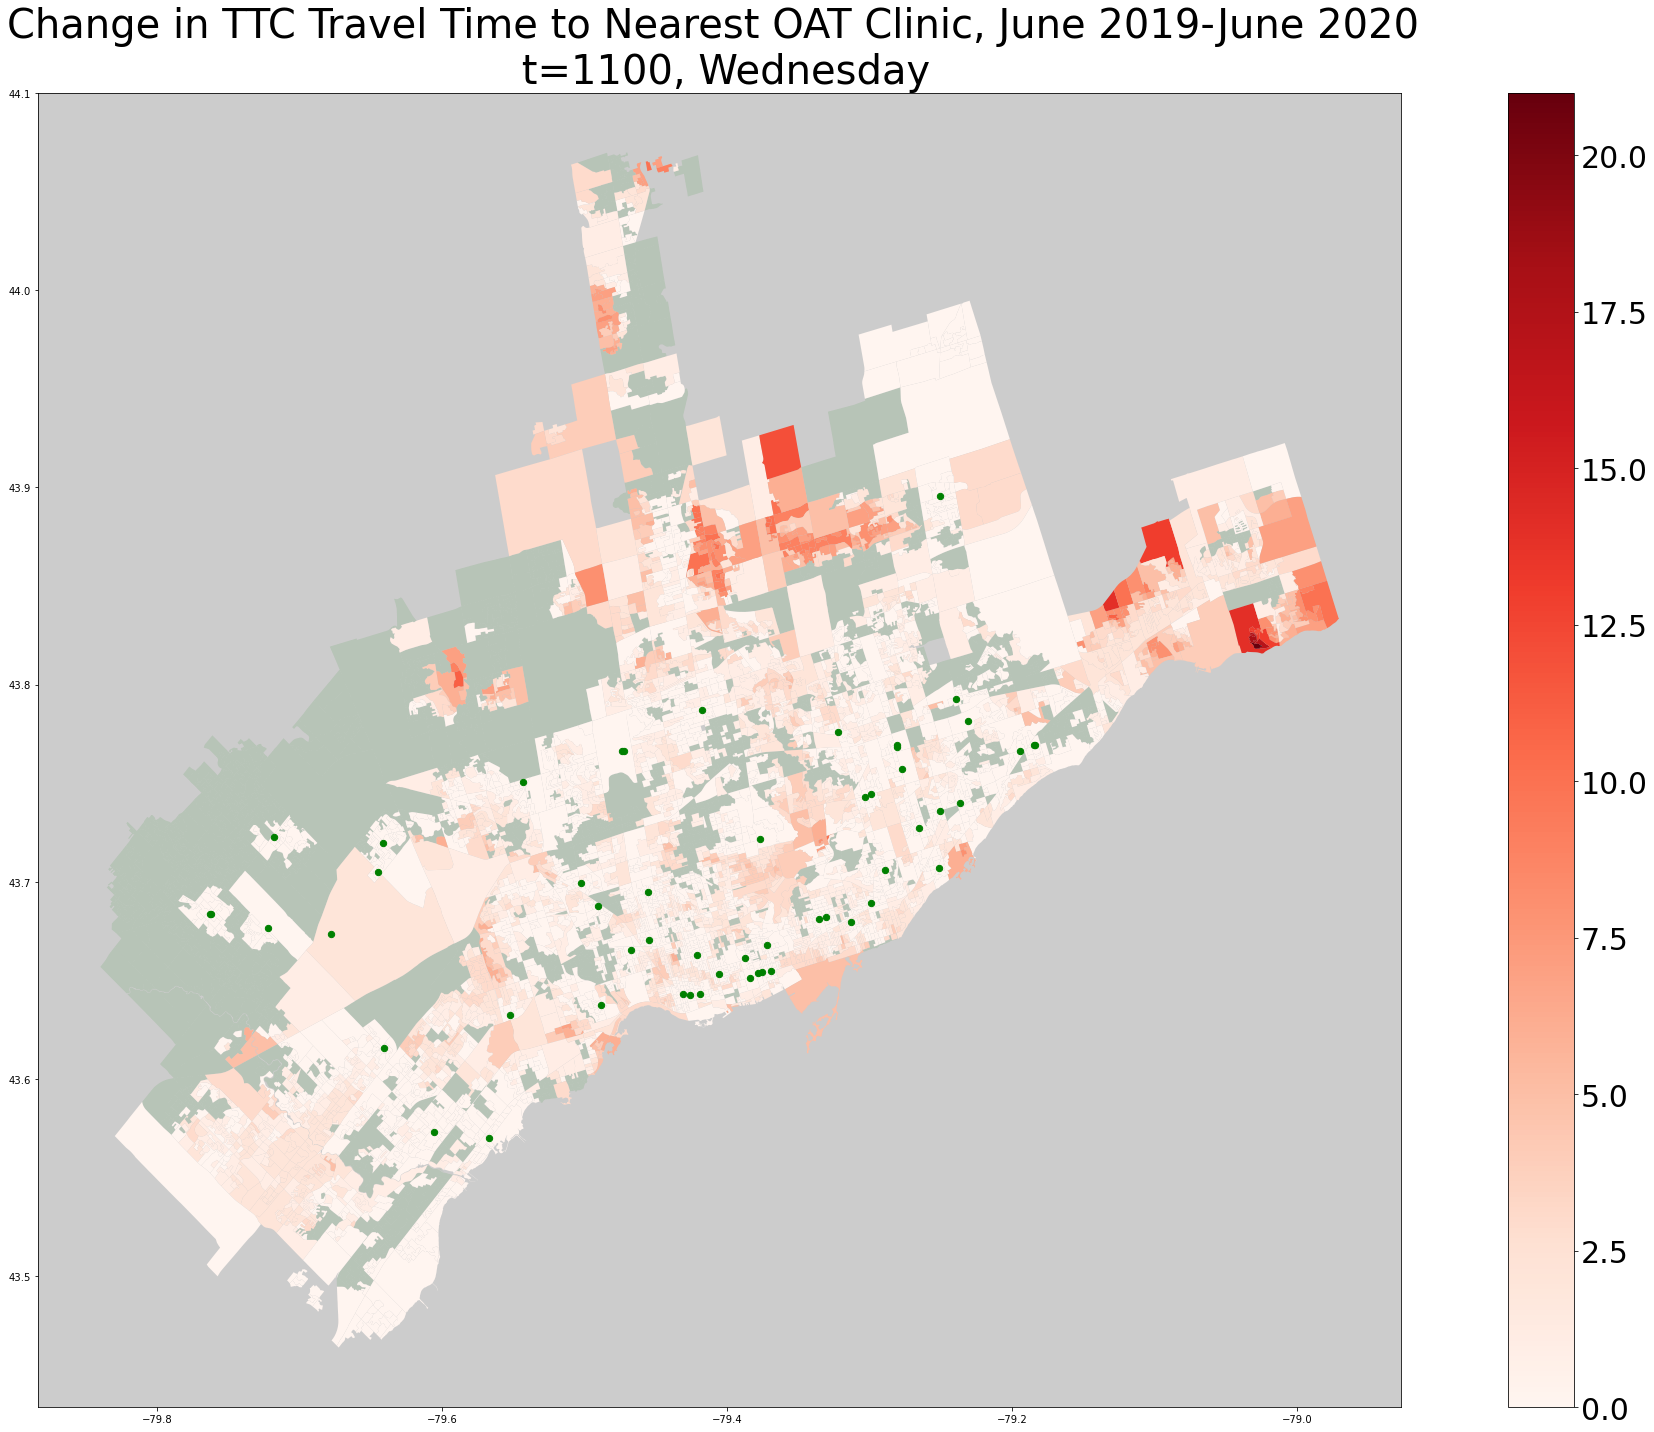

In [61]:
time = '1100'
fig, ax = plt.subplots(figsize=(30, 20))
master_df[(master_df['time']==time) & master_df['neg_access']==0].plot(column='diff', ax=ax, legend=True, color='green', alpha=0.1)
master_df[(master_df['time']==time) & master_df['neg_access']==1].plot(column='diff', ax=ax, legend=True, cmap='Reds')
clinics_gdf.plot(ax=ax, markersize=40, color='green')
cb_ax = fig.axes[1]
ax.patch.set_facecolor('black')
ax.patch.set_alpha(0.2)
plt.title(f"Change in TTC Travel Time to Nearest OAT Clinic, June 2019-June 2020 \n t={time}, Wednesday", fontsize=40)
cb_ax.tick_params(labelsize=30)
plt.tight_layout()
plt.savefig(f'/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/results/imgs/{time}.png')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


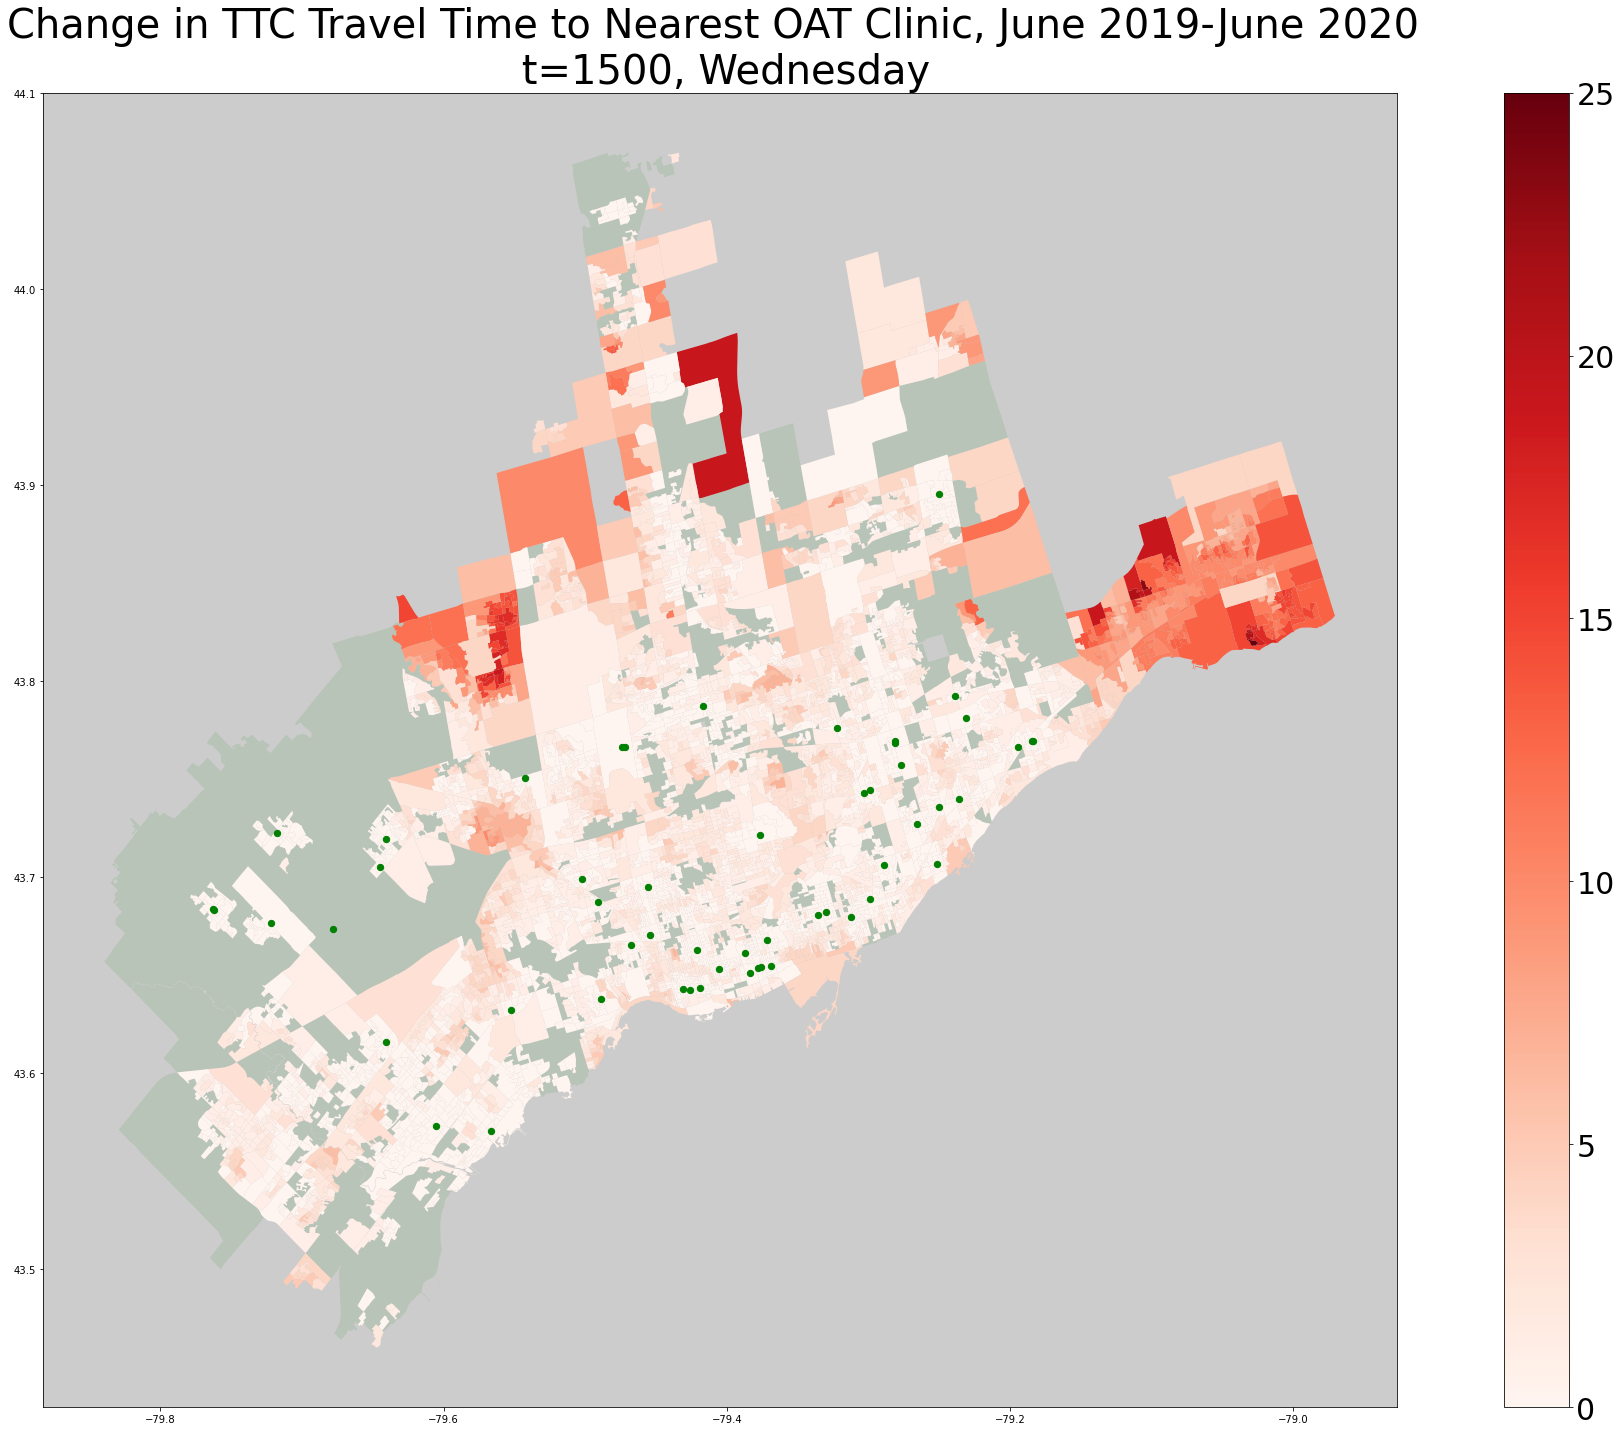

In [62]:
time = '1500'
fig, ax = plt.subplots(figsize=(30, 20))
master_df[(master_df['time']==time) & master_df['neg_access']==0].plot(column='diff', ax=ax, legend=True, color='green', alpha=0.1)
master_df[(master_df['time']==time) & master_df['neg_access']==1].plot(column='diff', ax=ax, legend=True, cmap='Reds')
clinics_gdf.plot(ax=ax, markersize=40, color='green')
cb_ax = fig.axes[1]
ax.patch.set_facecolor('black')
ax.patch.set_alpha(0.2)
plt.title(f"Change in TTC Travel Time to Nearest OAT Clinic, June 2019-June 2020 \n t={time}, Wednesday", fontsize=40)
cb_ax.tick_params(labelsize=30)
plt.tight_layout()
plt.savefig(f'/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/results/imgs/{time}.png')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


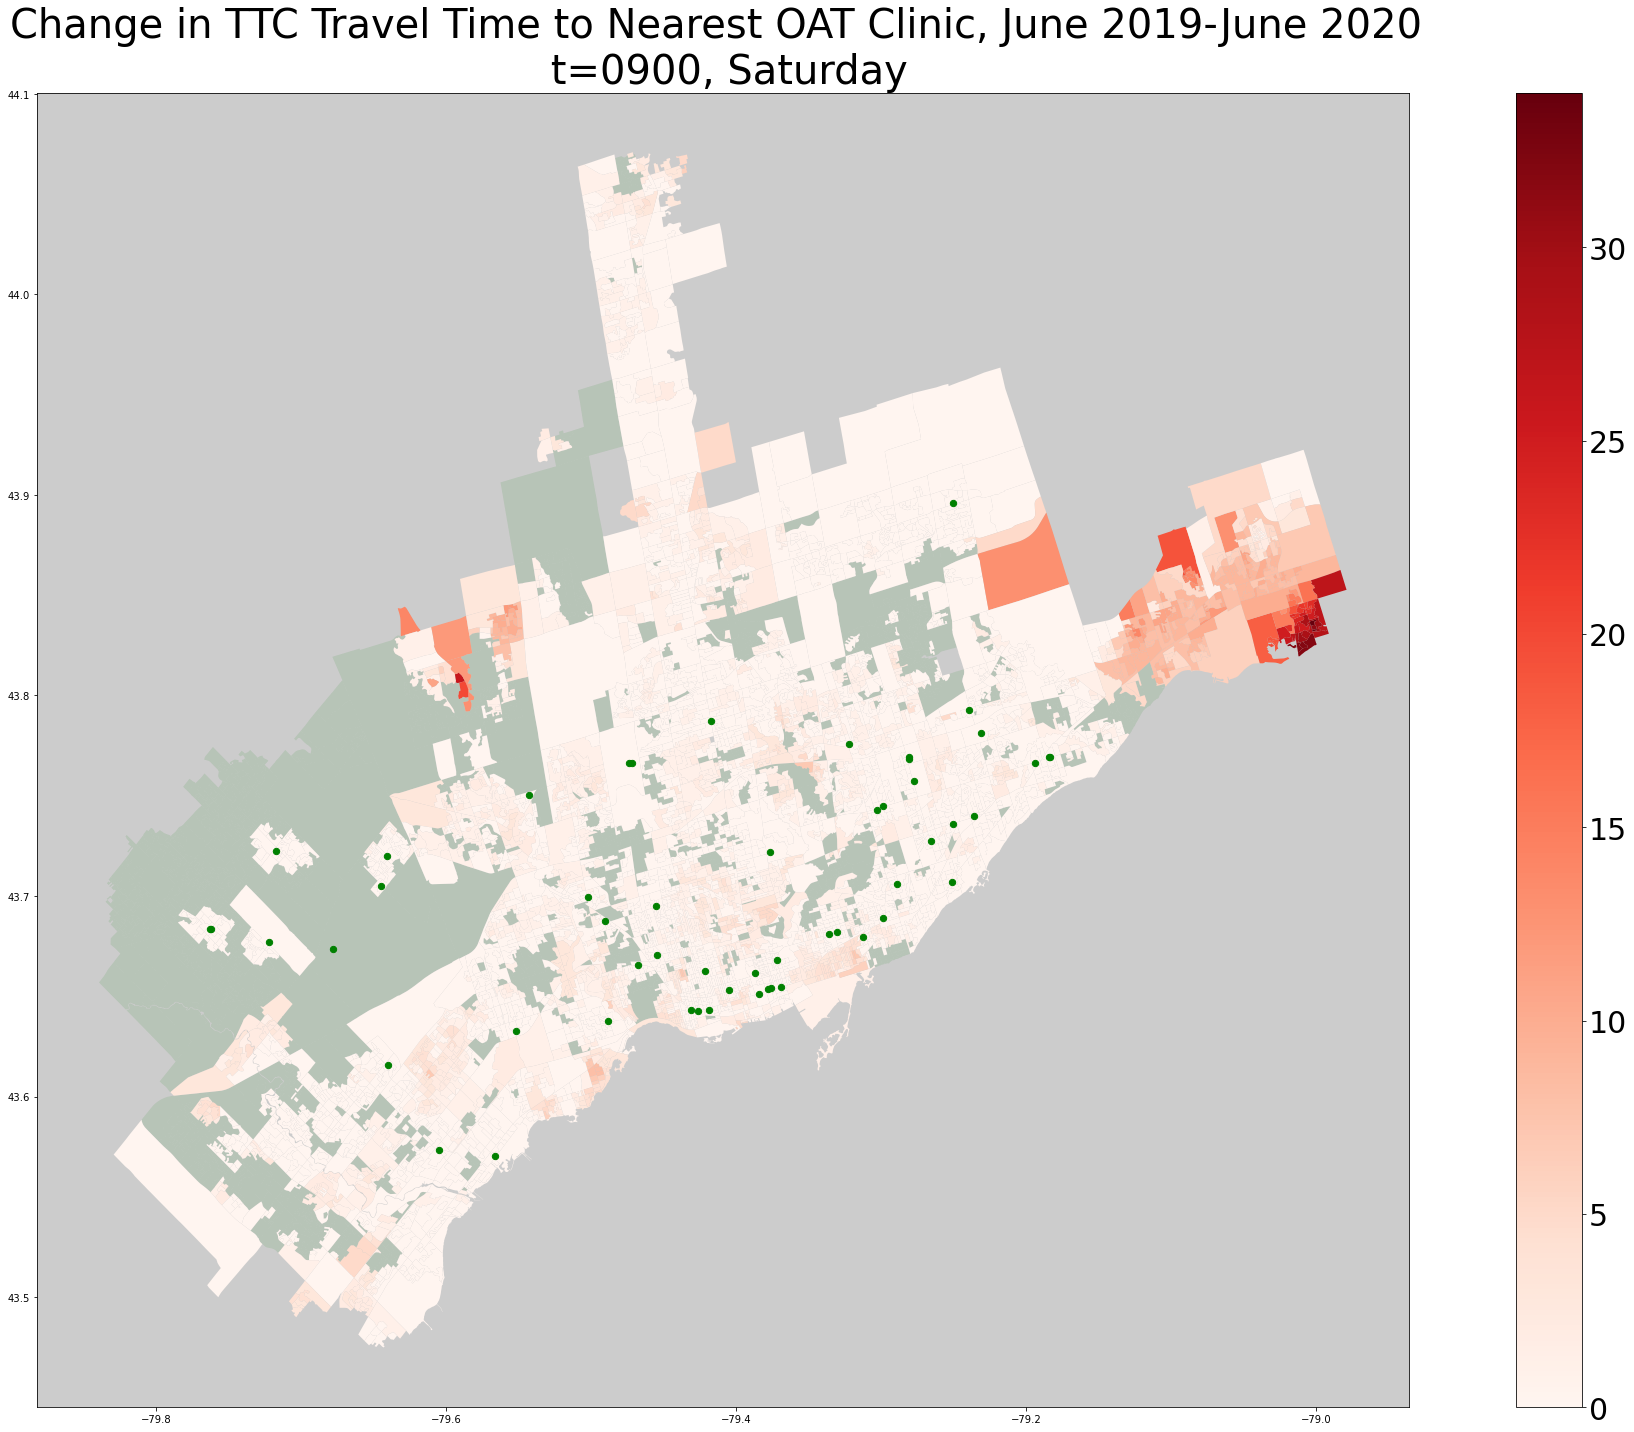

In [63]:
time = '0900_sat'
fig, ax = plt.subplots(figsize=(30, 20))
master_df[(master_df['time']==time) & master_df['neg_access']==0].plot(column='diff', ax=ax, legend=True, color='green', alpha=0.1)
master_df[(master_df['time']==time) & master_df['neg_access']==1].plot(column='diff', ax=ax, legend=True, cmap='Reds')
clinics_gdf.plot(ax=ax, markersize=40, color='green')
cb_ax = fig.axes[1]
ax.patch.set_facecolor('black')
ax.patch.set_alpha(0.2)
plt.title(f"Change in TTC Travel Time to Nearest OAT Clinic, June 2019-June 2020 \n t=0900, Saturday", fontsize=40)
cb_ax.tick_params(labelsize=30)
plt.tight_layout()
plt.savefig(f'/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/results/imgs/{time}.png')

In [58]:
master_df.groupby('time')['diff'].describe()

count      mean        std   min  25%  50%  75%   max
time                                                            
0800      6545.0 -1.269977  10.483993 -76.0  0.0  0.0  2.0  24.0
0900_sat  6474.0 -1.656781  10.286648 -78.0  0.0  0.0  1.0  34.0
1100      6505.0 -1.710992   9.994161 -73.0 -1.0  0.0  1.0  21.0
1500      6512.0 -1.006910  10.768210 -76.0  0.0  0.0  2.0  25.0

## Look at Pre-and-Post Travel Times to get Sense of Magnitudes

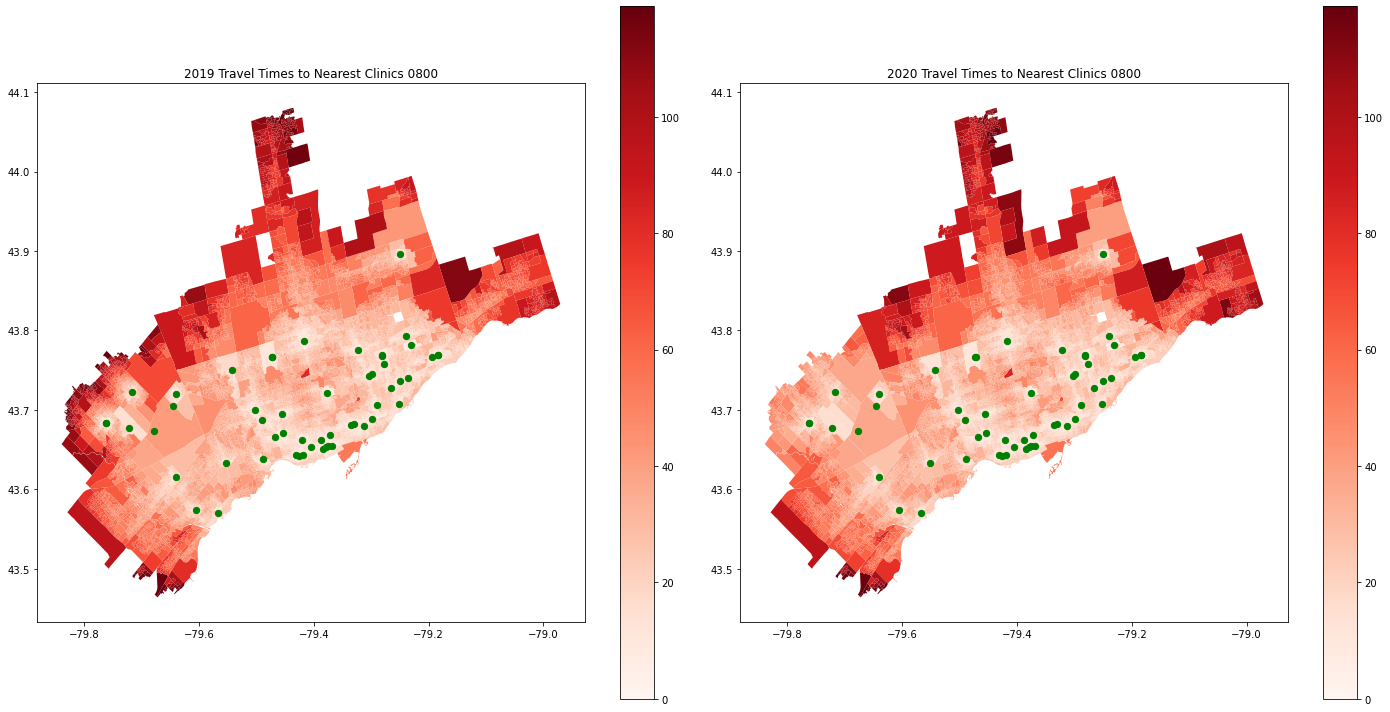

In [47]:
time = '0800'

#for min and max of colorbar
travel_times = master_df[master_df['time'] == time]['tt_2019'].append(master_df[master_df['time'] == time]['tt_2020'])

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
master_df[master_df['time'] == time].plot(ax= ax0, column='tt_2019', legend=True, cmap='Reds', vmin=travel_times.min(), vmax=travel_times.max())
master_df[master_df['time'] == time].plot(ax= ax1, column='tt_2020', legend=True, cmap='Reds', vmin=travel_times.min(), vmax=travel_times.max())

clinics_gdf.plot(ax=ax0, markersize=40, color='green')
clinics_gdf.plot(ax=ax1, markersize=40, color='green')

ax0.set_title(f"2019 Travel Times to Nearest Clinics {time}")
ax1.set_title(f"2020 Travel Times to Nearest Clinics {time}")

plt.tight_layout()
plt.savefig(f'/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/results/imgs/absolute_travel_times_{time}.png')

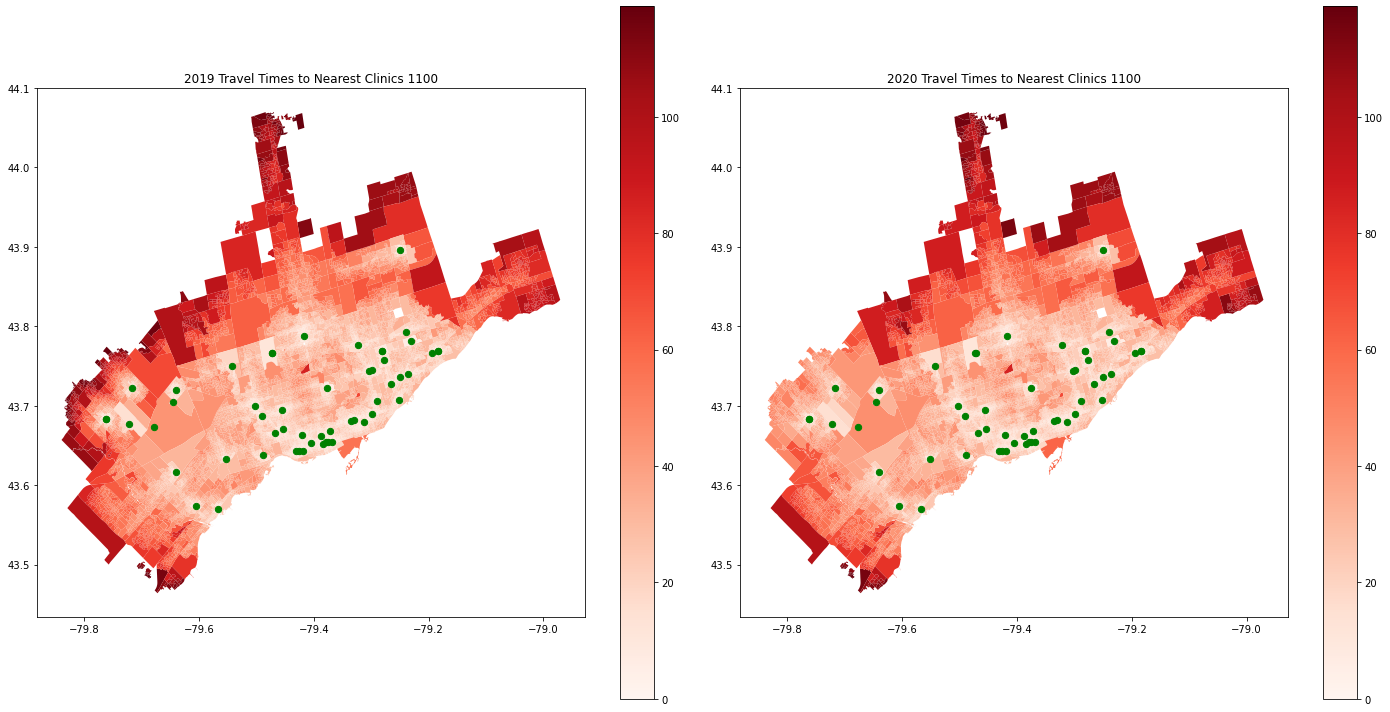

In [48]:
time = '1100'

#for min and max of colorbar
travel_times = master_df[master_df['time'] == time]['tt_2019'].append(master_df[master_df['time'] == time]['tt_2020'])

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
master_df[master_df['time'] == time].plot(ax= ax0, column='tt_2019', legend=True, cmap='Reds', vmin=travel_times.min(), vmax=travel_times.max())
master_df[master_df['time'] == time].plot(ax= ax1, column='tt_2020', legend=True, cmap='Reds', vmin=travel_times.min(), vmax=travel_times.max())

clinics_gdf.plot(ax=ax0, markersize=40, color='green')
clinics_gdf.plot(ax=ax1, markersize=40, color='green')

ax0.set_title(f"2019 Travel Times to Nearest Clinics {time}")
ax1.set_title(f"2020 Travel Times to Nearest Clinics {time}")

plt.tight_layout()
plt.savefig(f'/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/results/imgs/absolute_travel_times_{time}.png')

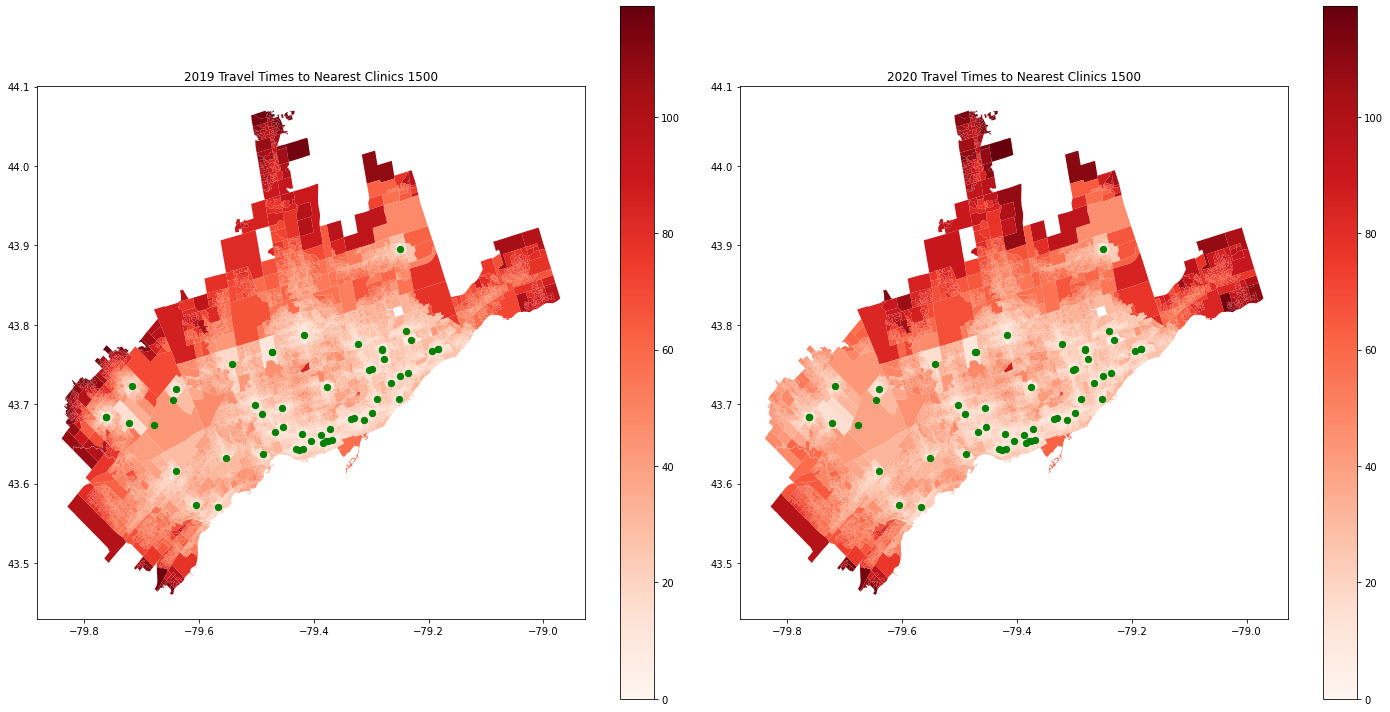

In [49]:
time = '1500'

#for min and max of colorbar
travel_times = master_df[master_df['time'] == time]['tt_2019'].append(master_df[master_df['time'] == time]['tt_2020'])

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
master_df[master_df['time'] == time].plot(ax= ax0, column='tt_2019', legend=True, cmap='Reds', vmin=travel_times.min(), vmax=travel_times.max())
master_df[master_df['time'] == time].plot(ax= ax1, column='tt_2020', legend=True, cmap='Reds', vmin=travel_times.min(), vmax=travel_times.max())

clinics_gdf.plot(ax=ax0, markersize=40, color='green')
clinics_gdf.plot(ax=ax1, markersize=40, color='green')

ax0.set_title(f"2019 Travel Times to Nearest Clinics {time}")
ax1.set_title(f"2020 Travel Times to Nearest Clinics {time}")

plt.tight_layout()
plt.savefig(f'/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/results/imgs/absolute_travel_times_{time}.png')

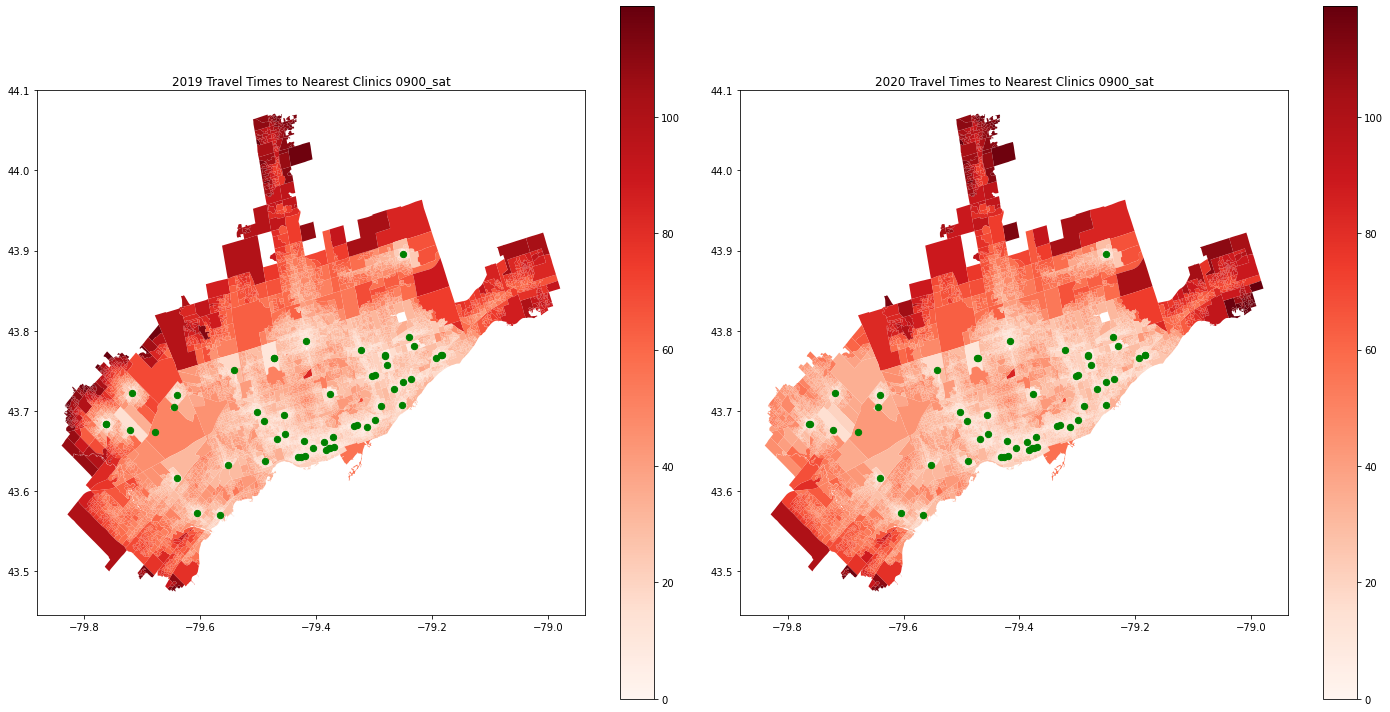

In [50]:
time = '0900_sat'

#for min and max of colorbar
travel_times = master_df[master_df['time'] == time]['tt_2019'].append(master_df[master_df['time'] == time]['tt_2020'])

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
master_df[master_df['time'] == time].plot(ax= ax0, column='tt_2019', legend=True, cmap='Reds', vmin=travel_times.min(), vmax=travel_times.max())
master_df[master_df['time'] == time].plot(ax= ax1, column='tt_2020', legend=True, cmap='Reds', vmin=travel_times.min(), vmax=travel_times.max())

clinics_gdf.plot(ax=ax0, markersize=40, color='green')
clinics_gdf.plot(ax=ax1, markersize=40, color='green')

ax0.set_title(f"2019 Travel Times to Nearest Clinics {time}")
ax1.set_title(f"2020 Travel Times to Nearest Clinics {time}")

plt.tight_layout()
plt.savefig(f'/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/results/imgs/absolute_travel_times_{time}.png')